In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU,Flatten, Dense,GlobalAveragePooling2D, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.applications import MobileNetV2


In [78]:

dataset_directory = 'Animals'

# Завантаження зображень
batch_size = 32
img_height = 300  # або інший бажаний розмір
img_width = 300

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
)


validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    labels="inferred",
    label_mode="int",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
)


Found 807 files belonging to 3 classes.
Using 646 files for training.
Found 807 files belonging to 3 classes.
Using 161 files for validation.


2024-11-16 20:18:00.844784: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


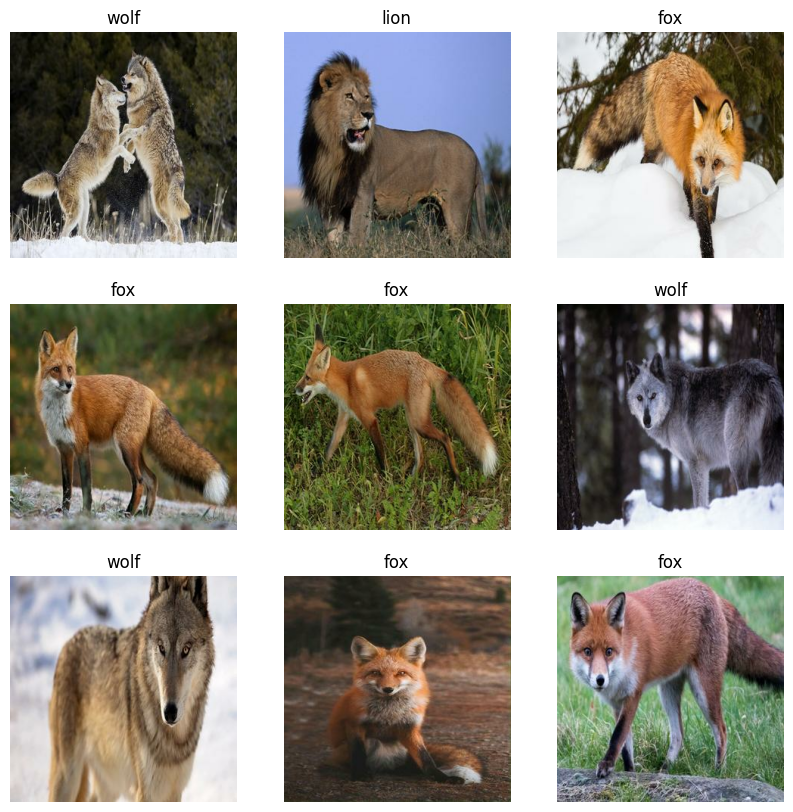

In [79]:

import matplotlib.pyplot as plt
import numpy as np
class_names = train_dataset.class_names

# Функція для виведення зображень з мітками
def display_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # беремо першу партію (batch)
        for i in range(9):  # відображаємо перші 9 зображень
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Виведення зображень із навчального набору
display_images(train_dataset)

### Build model from scratch

In [80]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
alpha = 0.02

model = keras.Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(300, 300, 3)))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.10))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(LeakyReLU(alpha=alpha))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=alpha))
model.add(Dropout(0.25))

model.add(Dense(3, activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 300, 300, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 300, 300, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 150, 150, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 150, 150, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 150, 150, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 92416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 512)            │    47,317,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,342,627 (180.60 MB)

 Trainable params: 47,342,627 (180.60 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=13,
    batch_size=batch_size,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 498ms/step - accuracy: 0.3863 - loss: 6.2146 - val_accuracy: 0.3354 - val_loss: 1.0797
Epoch 2/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 499ms/step - accuracy: 0.4740 - loss: 1.0373 - val_accuracy: 0.5404 - val_loss: 0.9979
Epoch 3/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 483ms/step - accuracy: 0.6161 - loss: 0.8592 - val_accuracy: 0.5280 - val_loss: 0.9283
Epoch 4/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 491ms/step - accuracy: 0.7130 - loss: 0.7354 - val_accuracy: 0.6149 - val_loss: 0.8472
Epoch 5/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 468ms/step - accuracy: 0.7547 - loss: 0.6085 - val_accuracy: 0.7081 - val_loss: 0.7789
Epoch 6/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 505ms/step - accuracy: 0.7606 - loss: 0.6304 - val_accuracy: 0.5839 - val_loss: 0.9179
Epoch 7/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.8201 - loss: 0.4417 - val_accuracy: 0.6832 - val_loss: 0.8217
Epoch 8/13
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 491ms/step - accuracy: 0.9104 - loss: 0.2593 - val_accu

In [82]:
score = model.evaluate(validation_dataset, verbose=0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.2286450862884521
Test accuracy: 0.7018633484840393


### Transfer learning from pre-trained weights

In [83]:
trained_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,  
                         weights='imagenet')

trained_model.trainable = False

model = Sequential()
model.add(trained_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


/var/folders/bc/rcgkn6p91vq7pnqphwwsg_380000gn/T/ipykernel_36359/2920674723.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  trained_model = MobileNetV2(input_shape=(img_height, img_width, 3),


In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 10, 10, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_21     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [87]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5,
    batch_size=batch_size,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 513ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0.9938 - val_loss: 0.0383
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - accuracy: 0.9969 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 0.0349
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - accuracy: 0.9980 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0318
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 430ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 1.0000 - val_loss: 0.0314


In [86]:
score = model.evaluate(validation_dataset, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03730345517396927
Test accuracy: 1.0
